# Turkey Student Evaluation Data Set
## Clustering - Unsupervised Learning
After loading the data and importing the necessary libraries, we try to learn information about the dataset using EDA. <br>
With PCA we can reduce the dimension of the large dataset to improve the interpretability of the dataset without losing too much information.<br>
We use the Elbow method and KMeans to see the optimum number of Clusters and show our results in a Scatter Diagram.

### Information about the columns:
instr: Instructor's identifier; values taken from {1,2,3}<br>
class: Course code (descriptor); values taken from {1-13}<br>
repeat: Number of times the student is taking this course; values taken from {0,1,2,3,...}<br>
attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4}<br>
difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5}<br>
Q1: The semester course content, teaching method and evaluation system were provided at the start.<br>
Q2: The course aims and objectives were clearly stated at the beginning of the period.<br> 
Q3: The course was worth the amount of credit assigned to it.<br>
Q4: The course was taught according to the syllabus announced on the first day of class.<br>
Q5: The class discussions, homework assignments, applications and studies were satisfactory.<br>
Q6: The textbook and other courses resources were sufficient and up to date.<br>
Q7: The course allowed field work, applications, laboratory, discussion and other studies.<br>
Q8: The quizzes, assignments, projects and exams contributed to helping the learning.<br>
Q9: I greatly enjoyed the class and was eager to actively participate during the lectures.<br>
Q10: My initial expectations about the course were met at the end of the period or year.<br>
Q11: The course was relevant and beneficial to my professional development.<br>
Q12: The course helped me look at life and the world with a new perspective.<br>
Q13: The Instructor's knowledge was relevant and up to date.<br>
Q14: The Instructor came prepared for classes.<br>
Q15: The Instructor taught in accordance with the announced lesson plan.<br>
Q16: The Instructor was committed to the course and was understandable.<br>
Q17: The Instructor arrived on time for classes.<br>
Q18: The Instructor has a smooth and easy to follow delivery/speech.<br>
Q19: The Instructor made effective use of class hours.<br>
Q20: The Instructor explained the course and was eager to be helpful to students.<br>
Q21: The Instructor demonstrated a positive approach to students.<br>
Q22: The Instructor was open and respectful of the views of students about the course.<br>
Q23: The Instructor encouraged participation in the course.<br>
Q24: The Instructor gave relevant homework assignments/projects, and helped/guided students.<br>
Q25: The Instructor responded to questions about the course inside and outside of the course.<br>
Q26: The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives.<br>
Q27: The Instructor provided solutions to exams and discussed them with students.<br>
Q28: The Instructor treated all students in a right and objective manner.<br>
Q1-Q28 are all Likert-type, meaning that the values are taken from {1,2,3,4,5} 

### Import Libraries and Load Data

In [2]:
# import libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'): # get file path
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/uci-turkiye-student-evaluation-data-set/turkiye-student-evaluation_generic.csv


In [3]:
# load data
df = pd.read_csv("/kaggle/input/uci-turkiye-student-evaluation-data-set/turkiye-student-evaluation_generic.csv")

### EDA - Exploratory Data Analysis

In [4]:
df.head() #first 5 entries

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [5]:
df.info()  # infos about the rows, columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [6]:
df.isnull().sum() # checking missing values

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

We have 5820 entries with 33 columns of information and no empty values.

In [7]:
df.describe() # statistical infos of the columns

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
df.corr() # the correlation between the columns

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
instr,1.000000,-0.039871,0.112763,-0.107231,-0.058368,-0.128931,-0.127070,-0.108949,-0.113222,-0.135606,...,-0.112485,-0.086831,-0.078101,-0.080586,-0.118889,-0.128880,-0.083563,-0.103499,-0.107664,-0.081672
class,-0.039871,1.000000,0.091527,-0.016312,-0.044899,-0.029542,-0.033274,-0.021534,-0.030165,-0.036584,...,-0.018727,-0.031234,-0.022758,-0.016553,-0.025983,-0.036712,-0.027816,-0.029491,-0.022576,-0.037364
nb.repeat,0.112763,0.091527,1.000000,-0.078086,0.110493,-0.024708,-0.041707,-0.035704,-0.033613,-0.031770,...,-0.045568,-0.042624,-0.046262,-0.045464,-0.041233,-0.033618,-0.049918,-0.035518,-0.032457,-0.044900
attendance,-0.107231,-0.016312,-0.078086,1.000000,0.436792,0.105266,0.149258,0.178393,0.138108,0.149747,...,0.190694,0.195166,0.204802,0.207740,0.177814,0.163546,0.204435,0.172695,0.144687,0.200150
difficulty,-0.058368,-0.044899,0.110493,0.436792,1.000000,0.052120,0.065031,0.071457,0.062171,0.064181,...,0.080017,0.091051,0.095628,0.099543,0.075317,0.072609,0.099682,0.064456,0.059370,0.090876
Q1,-0.128931,-0.029542,-0.024708,0.105266,0.052120,1.000000,0.866138,0.767381,0.849773,0.804757,...,0.699370,0.685299,0.673770,0.670702,0.728770,0.732167,0.672120,0.698924,0.709639,0.658873
Q2,-0.127070,-0.033274,-0.041707,0.149258,0.065031,0.866138,1.000000,0.850766,0.873556,0.861803,...,0.788643,0.778299,0.764986,0.766872,0.801172,0.797314,0.766622,0.778405,0.768125,0.752515
Q3,-0.108949,-0.021534,-0.035704,0.178393,0.071457,0.767381,0.850766,1.000000,0.826342,0.843329,...,0.799645,0.795384,0.791391,0.789747,0.799752,0.792241,0.793341,0.796296,0.765633,0.781299
Q4,-0.113222,-0.030165,-0.033613,0.138108,0.062171,0.849773,0.873556,0.826342,1.000000,0.867861,...,0.769526,0.759810,0.752171,0.748081,0.788852,0.789508,0.752370,0.766368,0.759536,0.742186
Q5,-0.135606,-0.036584,-0.031770,0.149747,0.064181,0.804757,0.861803,0.843329,0.867861,1.000000,...,0.809381,0.794833,0.780245,0.778777,0.831221,0.830279,0.782437,0.804916,0.791877,0.767411


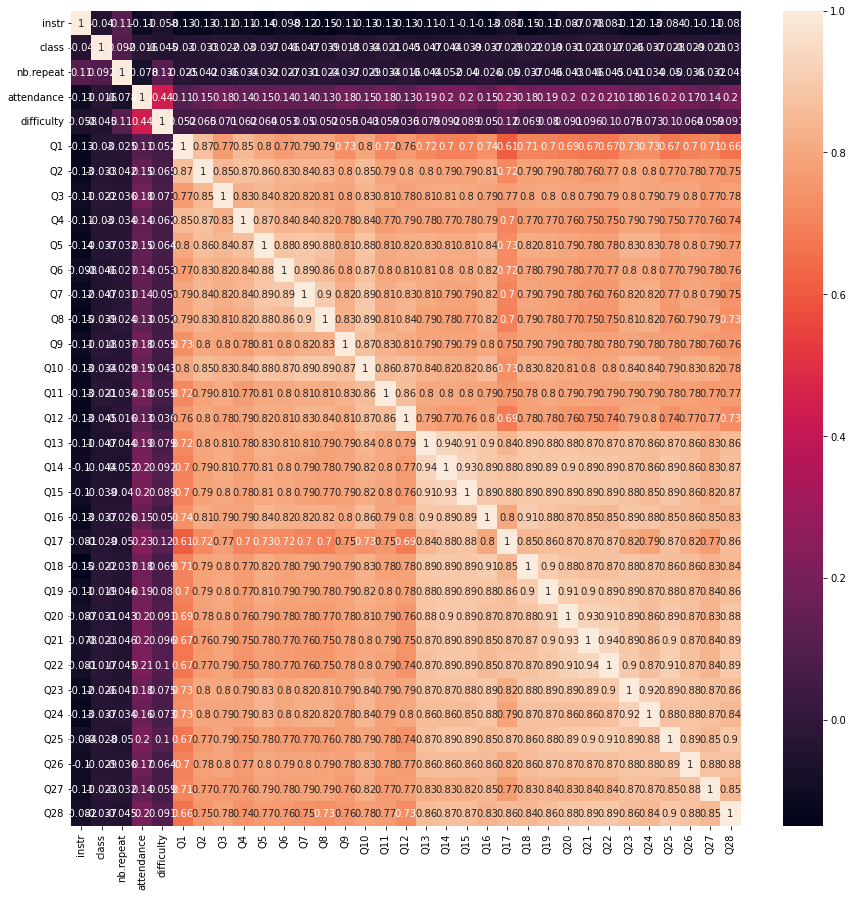

In [9]:
# Correlation of the columns shown in a heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True);

#### Data Visualization

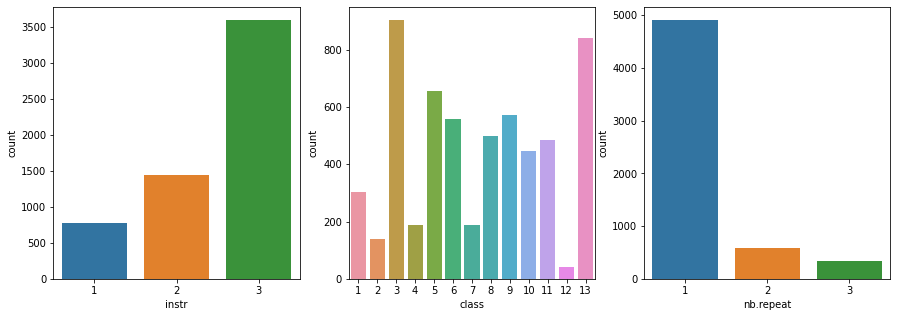

In [10]:
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1, 3, 1)
sns.countplot(x=df['instr'])
fig.add_subplot(1, 3, 2)
sns.countplot(x=df['class'])
fig.add_subplot(1, 3, 3)
sns.countplot(x=df['nb.repeat']);

Most of the courses are from Instructor 3.<br>
Out of 13 classes, class 3 is the most taken course followed closely by class 13.<br>
Most of the students just attend the classes only one time, while only the minority repeat the classes for the second or third time.                                                                             

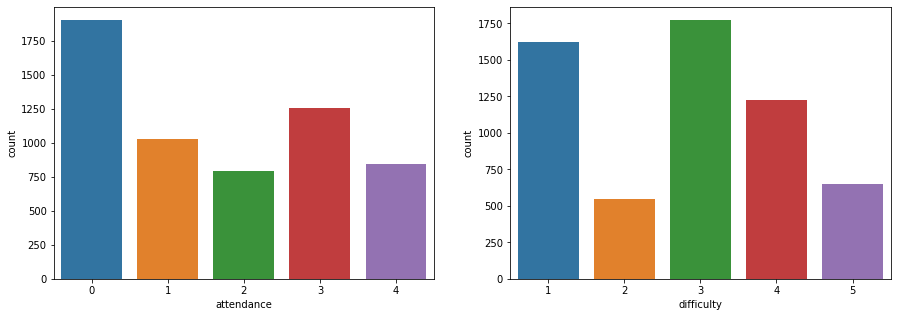

In [11]:
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1, 2, 1)
sns.countplot(x=df['attendance'])
fig.add_subplot(1, 2, 2)
sns.countplot(x=df['difficulty']);

We can see that most of the students dont attend their classes that often, since value 0 is most.<br>
Most of the classes have a medium difficulty, but also many classes are easy.

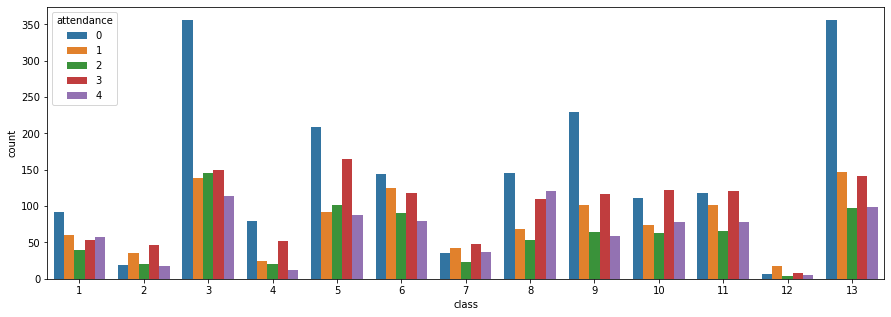

In [12]:
plt.figure(figsize=(15, 5)) # show the attendances of classes
sns.countplot(x="class",hue="attendance",data=df);

Here we can see that class 3 and 13 have the most '0' in attendance, class 12 is the class which has lowest the attendance.

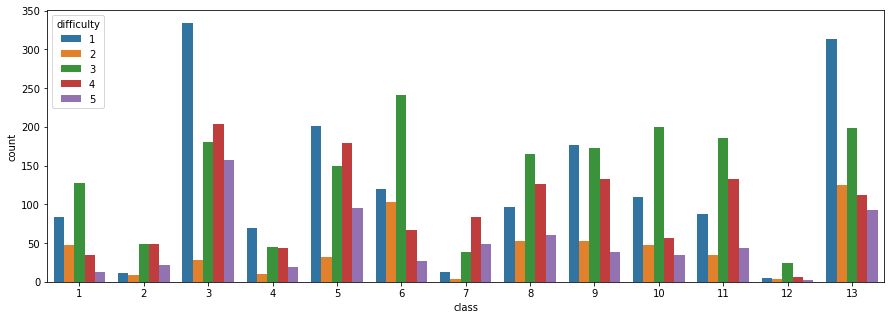

In [13]:
plt.figure(figsize=(15, 5)) # show the difficulty of classes
sns.countplot(x="class",hue="difficulty",data=df);

Most difficult class is no. 3 while also a lot of students think that it is easy, class 6 and 10 have the most average rating of difficulty.

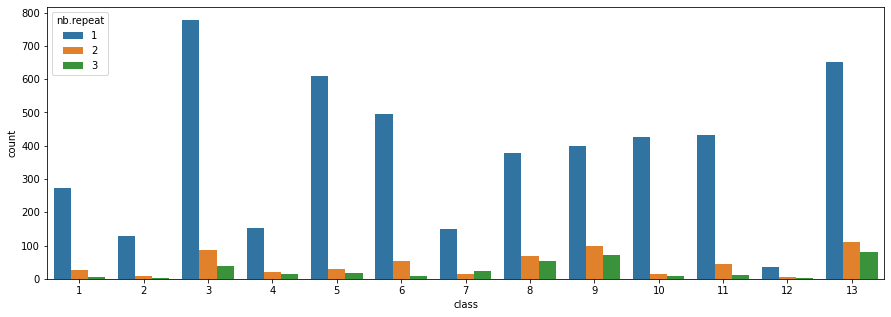

In [14]:
plt.figure(figsize=(15, 5)) # show how many times does a class get repeated
sns.countplot(x="class",hue="nb.repeat",data=df);

Class 13 and 9 are the most repeated classes.

### Using PCA to reduce dimensions

With **PCA _(Principal Component Analysis)_** we can reduce the columns from 28 to 2, which enables  increasing the interpretability of our large dataset while preserving the maximum amount of information.

We take all the Question columns to try to cluster the students based on the Questions responses.

In [15]:
x=df.iloc[:,5:33] # only Question columns
x.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components = 2) # reducing to 2 columns
x_pca=pca.fit_transform(x)

In [17]:
print("Data distribution:", pca.explained_variance_ratio_) 
print("Data loss: ", 1-sum(pca.explained_variance_ratio_))

Data distribution: [0.82198145 0.04515671]
Data loss:  0.13286183211089142


82% of the data values are in the first row, 4,5% in second. <br>
We have a total loss of 13% of the value.

### Using Elbow method and KMeans for Clustering

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Using elbow method to see how many clusters we should use.

In [35]:
allscore = []
allclusters = []
distances = []

# Score change according to cluster
def clust(n):
    
    for i in range(1,n+1):
        i=i+1
        # fit and predict model for range of clusters
        model=KMeans(n_clusters=i)
        model=model.fit(x_pca)
        pred=model.predict(x_pca)
        score=silhouette_score(x_pca,pred)
        distance=model.inertia_
        print("Cluster",i, "score:", score)
        # add the scores and distances to the lists
        allscore.append(score)
        allclusters.append(i)
        distances.append(distance)
clust(10) # call function wit 10 clusters

Cluster 2 score: 0.5285326545246618
Cluster 3 score: 0.5732420703968207
Cluster 4 score: 0.6000770046167156
Cluster 5 score: 0.6300187581326038
Cluster 6 score: 0.6513732775819655
Cluster 7 score: 0.6568277336634116
Cluster 8 score: 0.6660871862975237
Cluster 9 score: 0.6609554686871569
Cluster 10 score: 0.6582301608655416
Cluster 11 score: 0.6687883601814641


Lets see the results in a graph.

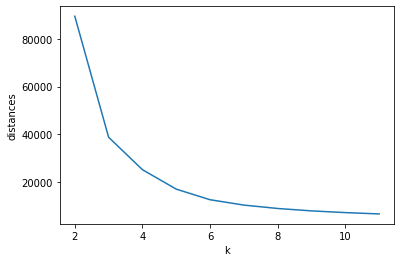

In [20]:
# plot the results in a graph
plt.xlabel("k")
plt.ylabel("distances")
plt.plot(allclusters,distances);

We can see that the graph is changing at the value of 3, so we use 3 clusters.

In [42]:
# Use 3 clusters, than fit and predict model
model=KMeans(n_clusters=3)
model=model.fit(x_pca)
pred=model.predict(x_pca)
print("Silhouette Score: ", silhouette_score(x_pca,pred)) # Print the Silhouette Score

Silhouette Score:  0.5732814711839688


Show end results in a Scatter Diagram.

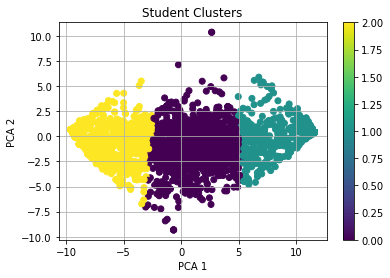

In [41]:
# Show the results in a scatter diagram
plt.scatter(x_pca[:,0], x_pca[:,1], c=model.labels_.astype(float))
plt.title('Student Clusters'), plt.xlabel('PCA 1'), plt.ylabel('PCA 2')
plt.colorbar(), plt.grid()
plt.show()

We can see that we have **3 Clusters of students** who are likely to give same negative, neutral or positive answers to the questions.